In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
dataset = pd.read_csv('position.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [21]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=42)

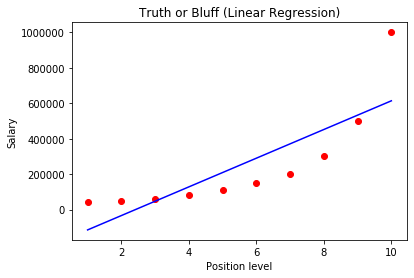

In [24]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [25]:
import statsmodels.api as sm
X1=sm.add_constant(X)
sm.OLS(y,X1).fit().summary()

C:\Users\reshw\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     16.17
Date:                Tue, 24 Dec 2019   Prob (F-statistic):            0.00383
Time:                        16:59:49   Log-Likelihood:                -134.23
No. Observations:                  10   AIC:                             272.5
Df Residuals:                       8   BIC:                             273.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.953e+05   1.25e+05     -1.565      0.156   -4.83e+05    9.24e+04
x1          8.088e+04   2.01e+04      4.021      0.004    3.45e+04    1.27e+05
==============================================================================
Omnibus:                        5.661   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                2.297
Skew:                           1.148   Prob(JB):                        0.317
Kurtosis:                       3.492   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

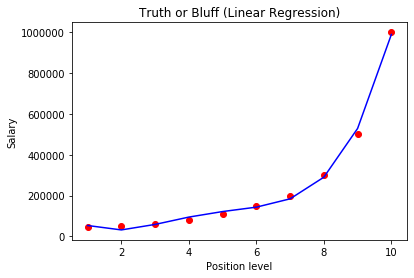

In [27]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [11]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

array([249500.])

In [12]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([132148.43750012])

In [17]:
import statsmodels.api as sm
X1=sm.add_constant(X)
sm.OLS(y,X_poly).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     478.1
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           1.21e-06
Time:                        16:05:52   Log-Likelihood:                -110.01
No. Observations:                  10   AIC:                             230.0
Df Residuals:                       5   BIC:                             231.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.842e+05   6.78e+04      2.718      0.042    9963.382    3.58e+05
x1          -2.11e+05   7.64e+04     -2.762      0.040   -4.07e+05   -1.47e+04
x2          9.477e+04   2.65e+04      3.582      0.016    2.68e+04    1.63e+05
x3         -1.546e+04   3534.989     -4.374      0.007   -2.46e+04   -6376.309
x4           890.1515    159.803      5.570      0.003     479.364    1300.939
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.767
Skew:                          -0.529   Prob(JB):                        0.681
Kurtosis:                       2.149   Cond. No.                     6.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""